In [1]:
import sys
import operator
import parse as p
import author_network as an
import regression as re
import numpy as np
import networkx as nx
import graphviz as gv
from matplotlib import pyplot as plt
from community import community_louvain
import collections
from node2vec import Node2Vec

In [2]:
re_file = ['../data/icml2019.json', '../data/icml2018.json','../data/icml2017.json']
re_years = [2017, 2018, 2019]
target = 2020
re_authors, re_papers = p.parse_json(re_file)
temp, temp1 = p.get_paper_count(re_authors)
re_author_names = temp[0]
re_counts = temp[1]

## Linear Regression of Authors

In [3]:
sort_author_name, sort_author_predict = re.get_author_regression(re_authors, re_papers, re_years, target)

[[2017, 434], [2018, 621], [2019, 773]]


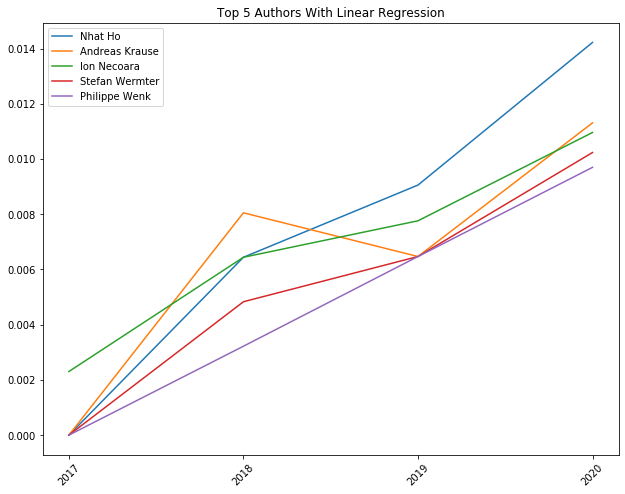

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
total_years = re_years + [target]
ax.set_xticks(total_years)
for i in range(5):
    plt.plot(total_years, sort_author_predict[i], label=sort_author_name[i])
plt.legend(loc='upper left')
plt.title('Top 5 Authors With Linear Regression')
plt.savefig('../image/linear_regression_authors.pdf', bbox_inches='tight')
plt.show()  

## Linear Regression of Research Groups

In [5]:
re_edges, re_alone = an.get_edges(re_authors, re_papers)
G_re = nx.MultiGraph()
G_re.add_edges_from(re_edges)
G_re.add_nodes_from(re_alone)
re_partition = community_louvain.best_partition(G_re)

In [6]:
# Adding number of papers attribute
for i in range(len(re_author_names)):
    G_re.nodes[re_author_names[i]]['papers'] = re_counts[i]
    
re_values = [re_partition.get(node) for node in G_re.nodes()]
re_counter = collections.Counter(re_values)

In [7]:
re_groups, G_gre = an.make_research_groups(G_re, re_values)
for group in re_groups:
    group.add_all_paper(re_authors)

In [8]:
sort_group_name, sort_group_predict = re.get_group_regression(re_groups, re_papers, re_years, target)

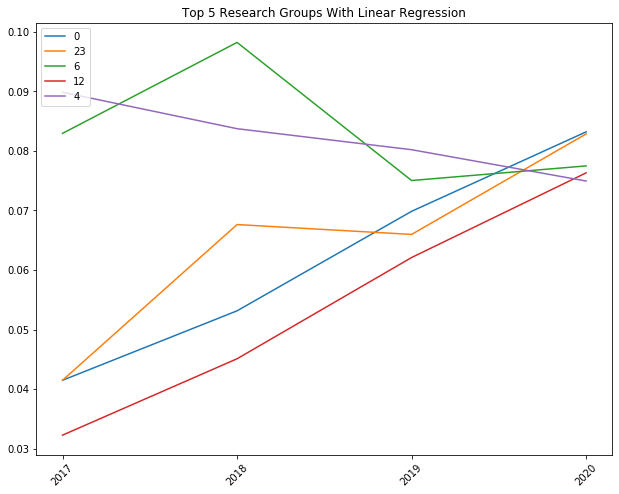

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
total_years = re_years + [target]
ax.set_xticks(total_years)
for i in range(5):
    plt.plot(total_years, sort_group_predict[i], label=str(sort_group_name[i]))
plt.legend(loc='upper left')
plt.title('Top 5 Research Groups With Linear Regression')
plt.savefig('../image/linear_regression_research_groups.pdf', bbox_inches='tight')
plt.show()